In [1]:
# import required libraries
from fastai.vision.all import *
from fastai.callback.core import Callback

In [2]:
# set path to the directory containing data
path = Path('Fabric Dataset-20230617T011229Z-001/Fabric Dataset/non-augmented-img')
IMG_SIZE = 150

In [3]:
# Define the labels
labels = [parent_label(img) for img in get_image_files(path)]

In [25]:
# define function to create dataset
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       splitter=TrainTestSplitter(test_size = 0.2, stratify=labels, random_state = 42, shuffle = True),
                       get_y=parent_label,
                       item_tfms=[Resize(IMG_SIZE, ResizeMethod.Pad)],
                       batch_tfms=[Normalize()])
dls = dblock.dataloaders(path, batch_size=64)

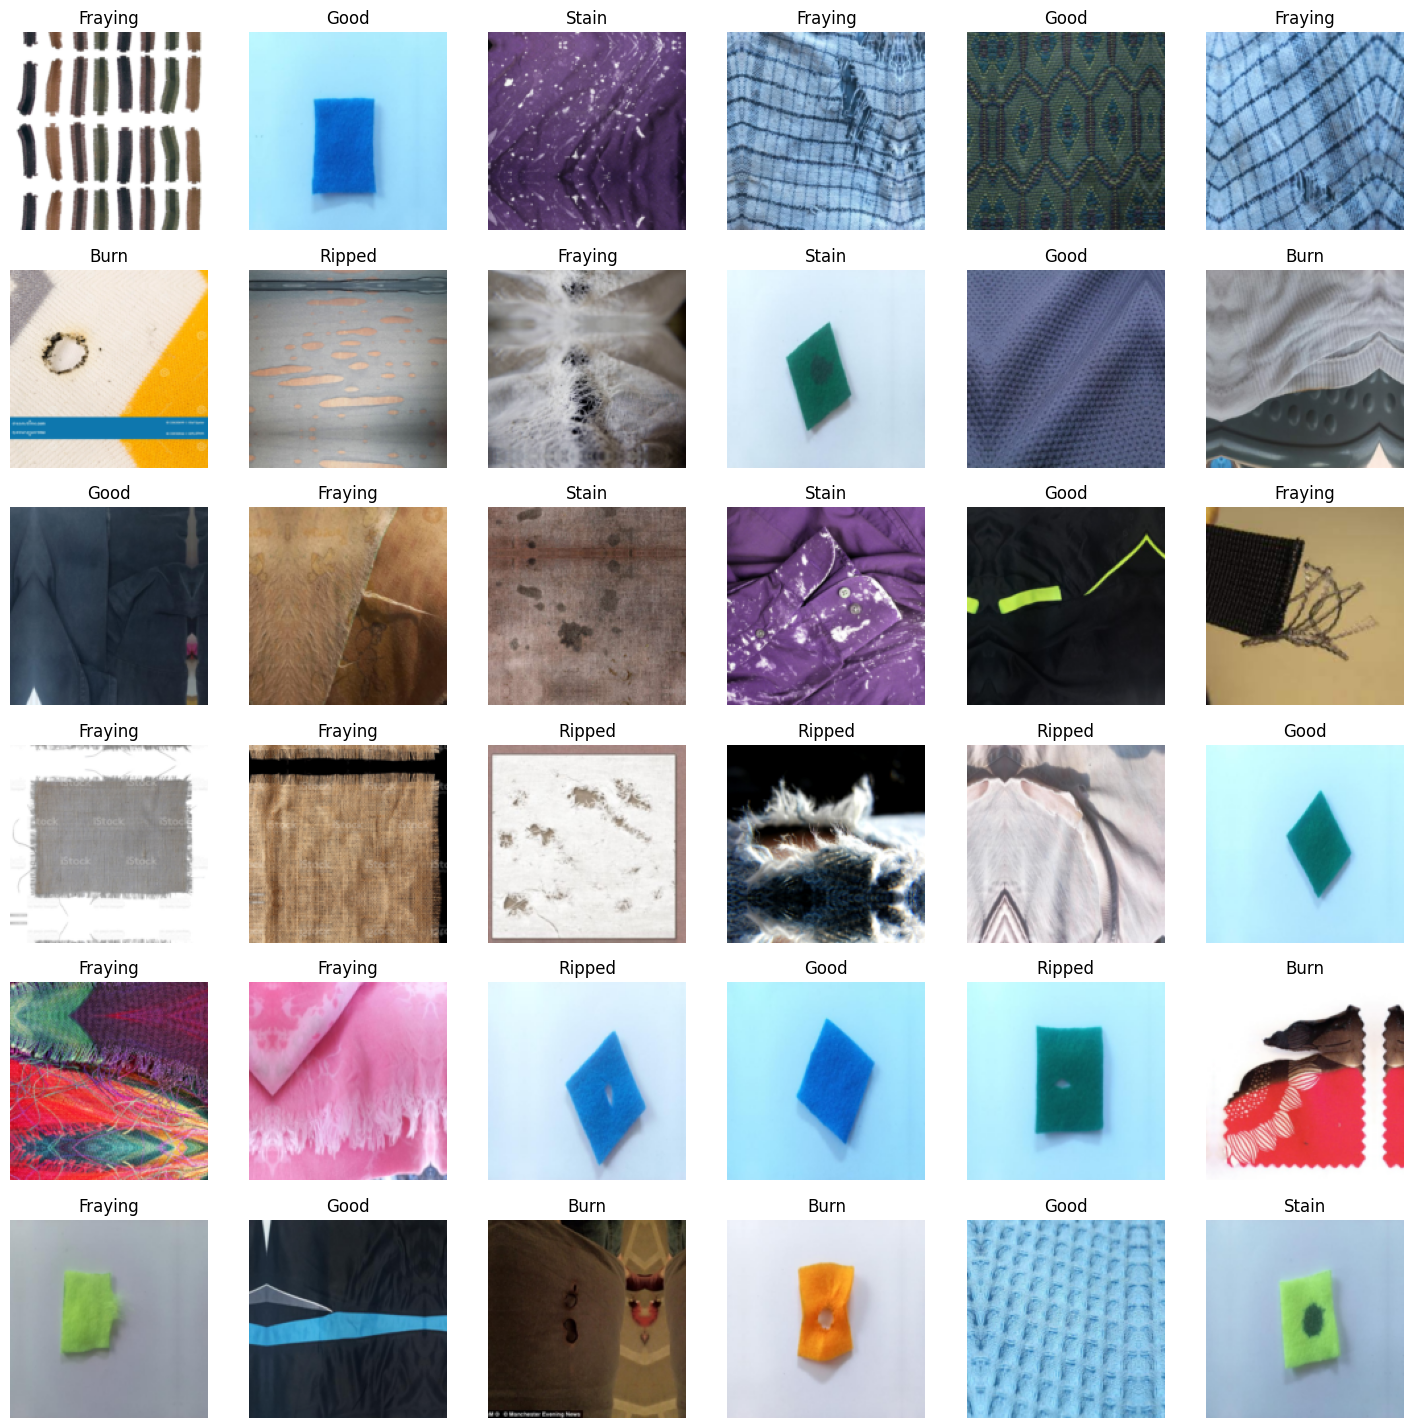

In [26]:
dls.show_batch(max_n=36)

In [11]:
print(dls.train.one_batch()[0].shape)

torch.Size([64, 3, 150, 150])


In [18]:
dls.vocab

['Burn', 'Fraying', 'Good', 'Ripped', 'Stain']

In [12]:
dls.valid.n

130

In [13]:
learn = vision_learner(dls, resnet50, metrics=[error_rate,accuracy], 
                       loss_func = CrossEntropyLossFlat(),cbs=[GradientAccumulation(n_acc=4), ShowGraphCallback(),  
                        EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)], pretrained=true)

c:\college task\skripsi\opencv topic\fastai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\college task\skripsi\opencv topic\fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0006918309954926372)

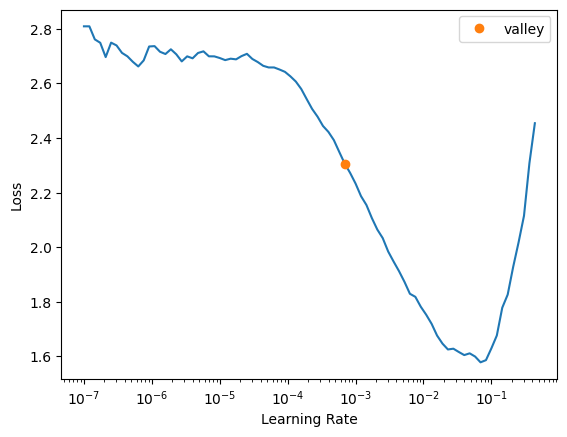

In [14]:
learn.lr_find()

<b> Fine Tune with Traceback <b>
    <p> Fine tuning is one of the technique that used on deep learning task. 
        The model that we fine-tune is ResNet50. For doing fine tuning we can run <b>learn.fine_tune(epochs,learning_rate)<b>.<p> 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.056560,0.918679,0.269231,0.730769,02:17
1,0.056674,0.878041,0.230769,0.769231,02:46
2,0.054130,0.964752,0.253846,0.746154,03:09
3,0.052540,1.057129,0.276923,0.723077,03:04
4,0.054901,1.011467,0.269231,0.730769,03:06


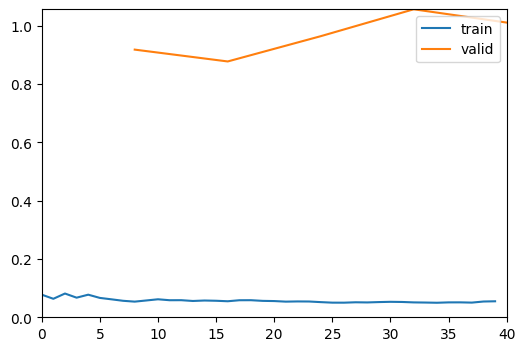

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.046219,1.012899,0.261538,0.738462,04:03
1,0.047075,0.999475,0.246154,0.753846,04:08
2,0.058307,0.998922,0.230769,0.769231,04:07
3,0.079626,1.174411,0.269231,0.730769,04:19
4,0.077384,0.916667,0.207692,0.792308,04:11
5,0.069006,0.863495,0.200000,0.800000,04:06
6,0.062020,0.889722,0.223077,0.776923,04:08
7,0.053167,0.946998,0.238462,0.761538,04:11
8,0.046175,0.966769,0.230769,0.769231,04:16
9,0.042084,0.972263,0.246154,0.753846,04:12


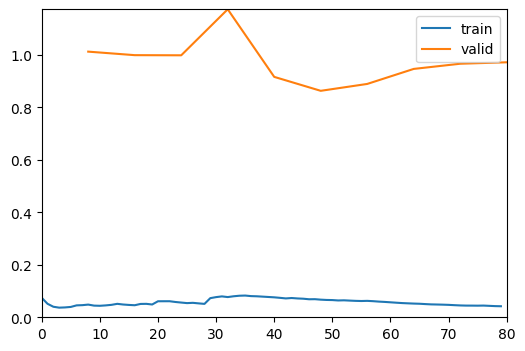

In [27]:
import traceback

try:
    learn.fine_tune(10, freeze_epochs = 5, base_lr=0.00069)
except Exception as e:
    print(traceback.format_exc())

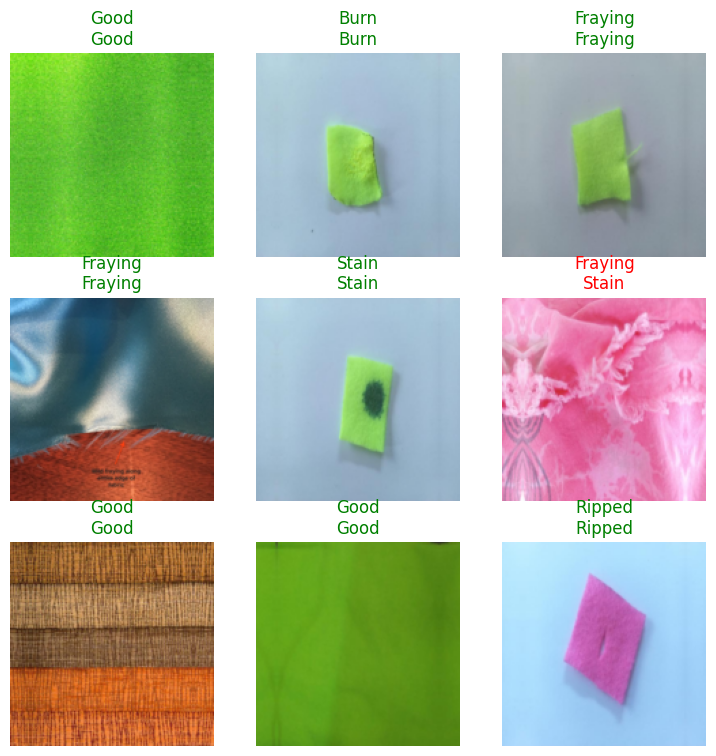

In [28]:
learn.show_results()

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

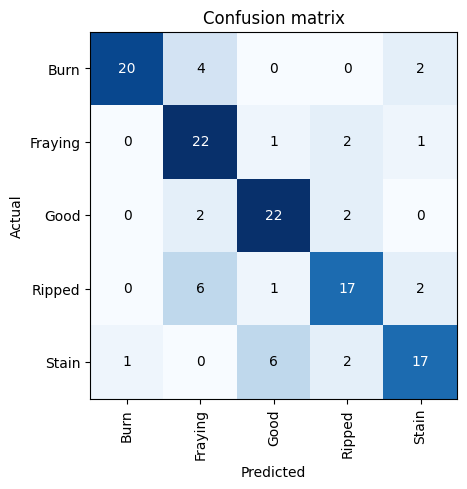

In [30]:
interp.plot_confusion_matrix()

In [31]:
learn.export('ModelFabric-StratSplit-1jul2023.pkl')

In [32]:
learn_inf = load_learner('ModelFabric-StratSplit-1jul2023.pkl')

In [33]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 2.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 2.jpeg')

('Burn', TensorBase(0), TensorBase([0.8796, 0.0047, 0.0353, 0.0794, 0.0009]))

In [34]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 3.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 3.jpeg')

('Good', TensorBase(2), TensorBase([0.0182, 0.3196, 0.5613, 0.0797, 0.0211]))

In [36]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/WhatsApp Image 2023-06-26 at 14.51.52.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/WhatsApp Image 2023-06-26 at 14.51.52.jpeg')

('Stain',
 TensorBase(4),
 TensorBase([1.7984e-03, 3.9696e-04, 9.2193e-04, 3.5765e-02, 9.6112e-01]))

In [37]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 4.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 4.jpeg')

('Good',
 TensorBase(2),
 TensorBase([4.9518e-04, 2.8935e-01, 7.0191e-01, 2.4238e-03, 5.8162e-03]))

In [38]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 5.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 5.jpeg')

('Burn', TensorBase(0), TensorBase([0.7497, 0.0013, 0.0869, 0.1375, 0.0246]))

In [40]:
from PIL import Image
img = Image.open('Fabric Dataset/Unseen Images/Ripped/20230701_124939.jpg')
img.show()
learn_inf.predict('Fabric Dataset/Unseen Images/Ripped/20230701_124939.jpg')

('Ripped',
 TensorBase(3),
 TensorBase([1.1384e-04, 1.4228e-06, 3.7399e-06, 9.8049e-01, 1.9394e-02]))

In [1]:
import cv2

print(cv2.__version__)

4.7.0
